In [3]:
import pandas as pd
import os

In [4]:
subj_profile = pd.read_csv("/data/wellbeing_bids/subj_profile.tsv",delimiter='\t',encoding='utf-8')

In [5]:
len(subj_profile)

250

In [8]:
import scipy.io as sio
mat_contents = sio.loadmat('/home/zohyos7/fmri/youngDat_N250_Dec2015.mat')
bad_subject_list = []
for i in range (mat_contents['r'][0,0]['badSubjectIDs'].shape[0]):
    val = mat_contents['r'][0,0]['badSubjectIDs'][i][0]
    bad_subject_list.append(val)
bad_subject_list

[2542, 2570, 2593, 2761, 2974, 2996, 3005, 3066, 3118]

In [9]:
subj_profile.reset_index(drop=True)

,subjID,political affiliation,language,birthPlace,isBadSubjects
0,2357,5,1,1,0
1,2359,2,11,1,0
2,2360,5,11,1,0
3,2364,4,1,1,0
4,2365,2,1,1,0
5,2371,5,1,1,0
6,2377,2,1,1,0
7,2431,2,1,1,0
8,2486,2,1,1,0
9,2505,2,1,1,0


In [10]:
for i in range(len(subj_profile)):
    if subj_profile['subjID'][i] in bad_subject_list or subj_profile['political affiliation'][i] not in [2,4,5]:
        subj_profile.drop([i], inplace = True)

In [11]:
len(subj_profile)

212

In [12]:
subject = subj_profile['subjID'].values.tolist()

In [13]:
def flatten(subject_list):
    from nilearn.masking import compute_epi_mask
    from nilearn.masking import apply_mask
    import numpy as np
    import pandas as pd
    
    #example = ('/data/wellbeing_analysis/datasink/2ndLevel/task_affect/fwhm_8/con_0008/mask.nii')
    #mask_img = compute_epi_mask(example)
    mask_img = '/data/wellbeing_analysis/datasink/2ndLevel/task_affect/fwhm_8/con_0008/mask.nii'
    flattened = []
    for i in subject:
        func_filename = ('/data/wellbeing_analysis/datasink/antsflow/sub-%s/con/task-affect/fwhm-8/con_0008_trans.nii' % i)
        if os.path.exists(func_filename):
            masked_data = apply_mask(func_filename, mask_img)
            print(i, masked_data[0])
            flattened.append(masked_data[0])
            #flattened.append(subj_profile[subj_profile['subjID'] == i]['political affiliation'].item())
        
    return flattened

In [14]:
import numpy as np
A = flatten(subject)
#A = np.asmatrix(A[0])

2359 [ 0.24676812  0.18812375  0.11913371 ... -0.49349255 -0.49066496
 -0.45957059]
2360 [-0.02697221 -0.06490664 -0.08305205 ... -1.00771853 -1.0962404
 -1.17147366]
2364 [-0.0017889  -0.04757755 -0.07675867 ...  0.84122415  0.84691087
  0.80195866]
2365 [0.48159793 0.45437547 0.39890448 ... 0.78316093 0.77077743 0.71976859]
2371 [0.403567   0.44446241 0.44425051 ... 0.69918146 0.66278039 0.61116325]
2377 [-0.0434935  -0.04596286 -0.04537775 ... -0.21104544 -0.24186159
 -0.26097402]
2431 [-0.11683103 -0.13104567 -0.13226547 ... -0.4298114  -0.38932604
 -0.34802774]
2486 [-0.34407981 -0.46286315 -0.53174951 ... -0.06452828 -0.06988503
 -0.06540748]
2505 [-0.34144586 -0.33937918 -0.29968378 ... -0.37709602 -0.44593647
 -0.5104344 ]
2523 [-0.11415742 -0.12550194 -0.13214936 ...  0.10347549  0.05917589
 -0.02974341]
2528 [-0.01756577 -0.03198826 -0.04588842 ...  0.44771517  0.554006
  0.57864808]
2538 [ 0.14759337  0.19801859  0.21978299 ... -0.31959382 -0.24244016
 -0.11198977]
2540 [ 0.

In [26]:
A = np.asmatrix(A)

In [27]:
%matplotlib inline

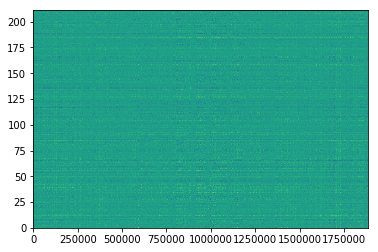

In [28]:
import matplotlib.pyplot as plt

plt.imshow(A[:211,:1886574], extent=[0,1886574,0,211], aspect='auto')
plt.show()